<a href="https://www.kaggle.com/code/sailikhitarage/maize-mutant-classification-using-vgg16?scriptVersionId=119114147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model 

**Data Preprocessing**

converting categorical labels to numeric codes

In [2]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1],[2],[3]])   

OneHotEncoder()

**Loading the data**

Resizing the image based on input dimension required for the model

In [3]:
input_path = []
label = []

In [4]:
data = []
paths = []
result = []
fpath = []
for r,d,f in os.walk(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Blight","Blight",path))
        result.append(encoder.transform([[0]]).toarray())
print(len(paths))

275


In [5]:
paths = []
for r,d,f in os.walk(r"../input/corn-or-maize-leaf-disease-dataset/data/Common_Rust"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("Common_Rust","Common_Rust",path))
        result.append(encoder.transform([[1]]).toarray())
print(len(paths))

114


In [6]:
paths = []
for r,d,f in os.walk(r"../input/corn-or-maize-leaf-disease-dataset/data/Gray_Leaf_Spot"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(2)
        input_path.append(os.path.join("Gray_Leaf_Spot","Gray_Leaf_Spot",path))
        result.append(encoder.transform([[2]]).toarray())
print(len(paths))
print(len(input_path))

128
512


In [7]:
paths = []
for r,d,f in os.walk(r"../input/corn-or-maize-leaf-disease-dataset/data/Healthy"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(3)
        input_path.append(os.path.join("Healthy","Healthy",path))
        result.append(encoder.transform([[3]]).toarray())
print(len(paths))

1141


In [8]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Healthy/Healthy/../input/corn-or-maize-leaf-di...,3
1,Healthy/Healthy/../input/corn-or-maize-leaf-di...,3
2,Healthy/Healthy/../input/corn-or-maize-leaf-di...,3
3,Healthy/Healthy/../input/corn-or-maize-leaf-di...,3
4,Healthy/Healthy/../input/corn-or-maize-leaf-di...,3


In [9]:
pd.unique(df['label'])

array([3, 1, 0, 2])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

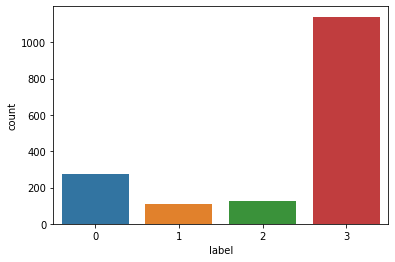

In [10]:
import seaborn as sns
sns.countplot(df['label'])

In [11]:
print("Total no.of images are :",len(result))

Total no.of images are : 1653


In [12]:
len(data)

1653

In [13]:
len(label)

1653

In [14]:
result = np.array(result)
result = result.reshape(-1,4)

In [15]:
result.shape

(1653, 4)

In [16]:
data = np.array(data)
data.shape

(1653, 224, 224, 3)

**Displaying random images**

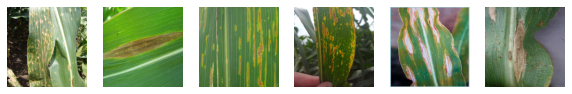

In [17]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

**Splitting data into training and testing data**

In [18]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 100)

In [19]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [20]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (1239, 224, 224, 3)
x_test Shape :  (414, 224, 224, 3)
y_train Shape:  (1239, 4)
y_test Shape:  (414, 4)


**Pre-Trained VGG16 model**

In [22]:
modelVGG = VGG16(include_top = False,weights = 'imagenet', classifier_activation = 'Softmax',input_shape = (224, 224, 3))

2023-02-14 06:24:54.540047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 06:24:54.681045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 06:24:54.682059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 06:24:54.683967: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 3s 0us/step


In [23]:
for layer in modelVGG.layers:
    layer.trainable = False

In [24]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dropout(0.625, name='dropout_1')(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        #top_model = Dropout(0.625, name='dropout_2')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [25]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

**Summary of the network layers**

In [26]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
# summarize filters in each convolutional layer
#from keras.applications.vgg16 import VGG16
#from matplotlib import pyplot
# load the model
#model = VGG16()
# summarize filter shapes
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)


block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [28]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

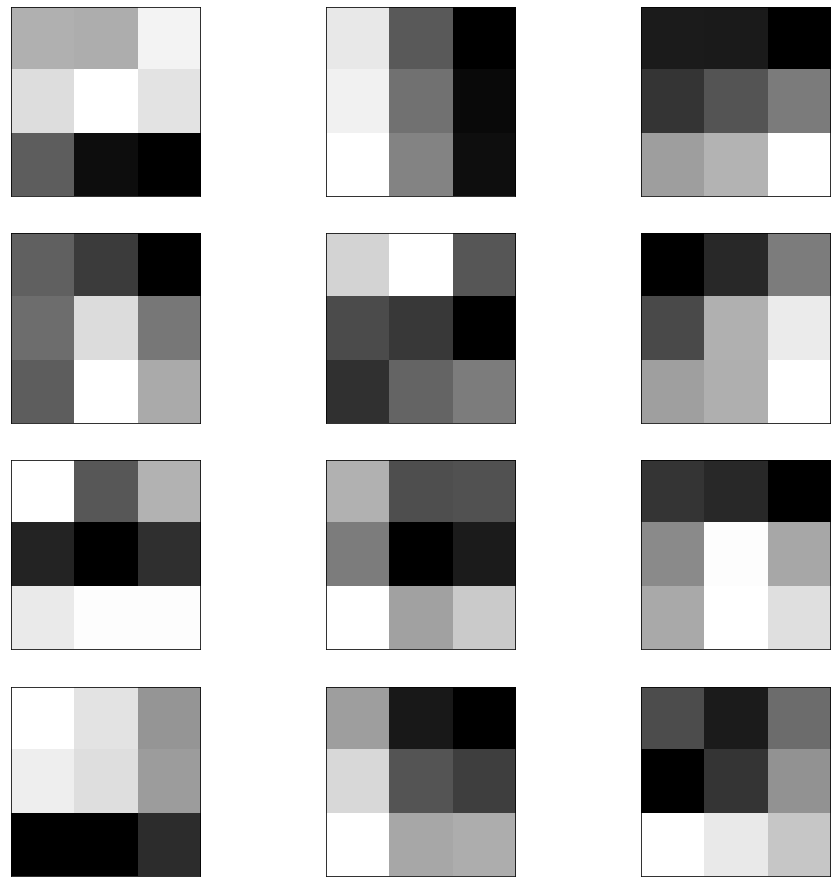

In [29]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(16,16))
nof_filters, ix = 4, 1
for i in range(nof_filters):
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        ax = plt.subplot(nof_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

**Compiling the VGG16 model**

In [64]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [65]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)
datagen.fit(x_train)

**Fitting the Model**

In [66]:
#history = model.fit(x_train , y_train , epochs = 10, validation_data = (x_test , y_test), verbose = 1)
history = model.fit(datagen.flow(x_train,y_train),epochs=40,validation_data=(x_test,y_test),verbose=1)

Epoch 1/40
39/39 [==============================] - 15s 374ms/step - loss: 0.2600 - accuracy: 0.8846 - val_loss: 0.5429 - val_accuracy: 0.8865
Epoch 2/40
39/39 [==============================] - 15s 379ms/step - loss: 0.2316 - accuracy: 0.9023 - val_loss: 0.4469 - val_accuracy: 0.8889
Epoch 3/40
39/39 [==============================] - 15s 385ms/step - loss: 0.2272 - accuracy: 0.9023 - val_loss: 0.4722 - val_accuracy: 0.8792
Epoch 4/40
39/39 [==============================] - 15s 396ms/step - loss: 0.2315 - accuracy: 0.9023 - val_loss: 0.4591 - val_accuracy: 0.8889
Epoch 5/40
39/39 [==============================] - 15s 381ms/step - loss: 0.2106 - accuracy: 0.9072 - val_loss: 0.6391 - val_accuracy: 0.8768
Epoch 6/40
39/39 [==============================] - 15s 384ms/step - loss: 0.2183 - accuracy: 0.9104 - val_loss: 0.5347 - val_accuracy: 0.9034
Epoch 7/40
39/39 [==============================] - 14s 369ms/step - loss: 0.1721 - accuracy: 0.9298 - val_loss: 0.5128 - val_accuracy: 0.8889

In [67]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

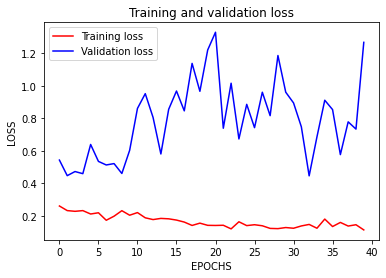

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc=0)
plt.figure()

plt.show()

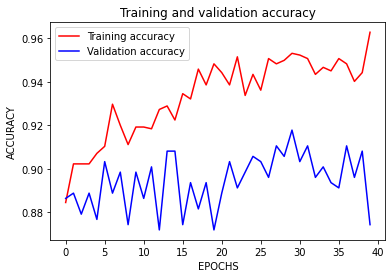

<Figure size 432x288 with 0 Axes>

In [69]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')

plt.figure()

plt.show()

In [70]:
print('Test accuracy:', model.evaluate(x_test, y_test))

13/13 [==============================] - 1s 62ms/step - loss: 1.2683 - accuracy: 0.8744
Test accuracy: [1.2683255672454834, 0.8743961453437805]


In [71]:
def names(number):
    if number==0:
        return "It's a leaf with disease BLIGHT"
    elif number==1:
        return "It's a leaf with disease Common Rust"
    elif number==2:
        return "It's a leaf with disease Gray_Leaf_Spot"
    elif number==3:
        return "It's a Healthy leaf"

**Testing the model**

In [72]:
from matplotlib.pyplot import imshow
def Prediction(img):
    #img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight/Corn_Blight (1010).JPG")
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.1641640663147% Confidence It's a leaf with disease BLIGHT


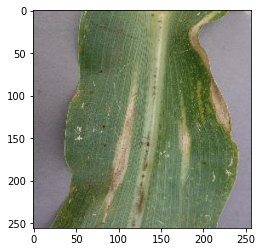

In [73]:
img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight/Corn_Blight (1010).JPG")
Prediction(img)

Testing with other random images

85.32097339630127% Confidence It's a leaf with disease BLIGHT


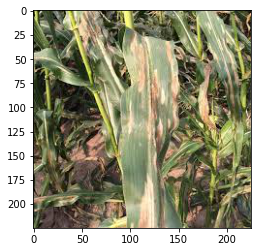

In [74]:
img = Image.open(r"../input/leafmutant/Leaf_disease_testdataset/Blight/Bim6.jpg")
Prediction(img)

53.93519401550293% Confidence It's a leaf with disease BLIGHT


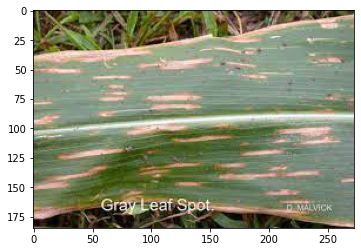

In [75]:
img = Image.open(r"../input/leafmutant/Leaf_disease_testdataset/GrayLeafSpot/Gim1.jpg")
Prediction(img)

91.58638119697571% Confidence It's a leaf with disease BLIGHT


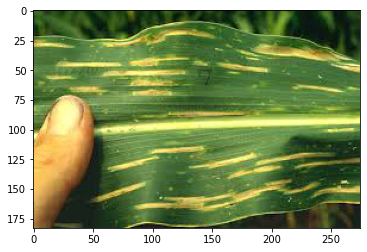

In [76]:
img = Image.open(r"../input/leafmutant/Leaf_disease_testdataset/GrayLeafSpot/Gim7.jpg")
Prediction(img)

99.79450106620789% Confidence It's a leaf with disease Common Rust


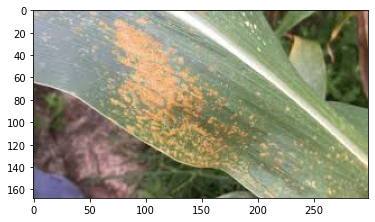

In [77]:
img = Image.open(r"../input/leafmutant/Leaf_disease_testdataset/CommonRust/CRim10.jpg")
Prediction(img)

100.0% Confidence It's a Healthy leaf


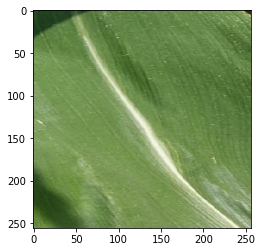

In [78]:
img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Healthy/Corn_Health (1034).jpg")
Prediction(img)

100.0% Confidence It's a Healthy leaf


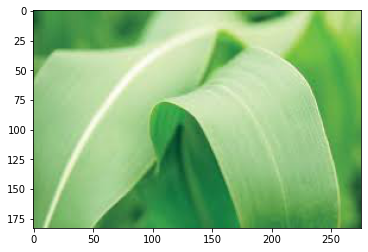

In [79]:
img = Image.open(r"../input/leafmutant/Leaf_disease_testdataset/Healthy/im8.jpg")
Prediction(img)